<a href="https://colab.research.google.com/github/CristoferSilva/SyntheticTimeSeriesDataser/blob/main/syntheticTimeSeriesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore the creation of a dataset with independent and dependente synthetic times series.

### Helpful links


1.   [Timeseries correlation : instantaneous phase synch](https://www.kaggle.com/code/adepvenugopal/timeseries-correlation-instantaneous-phase-synch)
2.   [How to add a phase shift to a sin wave in the frequency domain with fft?](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)
3. [Danger in performing phase shift with Python for a time series](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)



### Imports



In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np  
from src.time_serie_generator import TimeSerieGenerator
import scipy.stats as st

### Implementation

In [2]:
tmsg = TimeSerieGenerator()
time_series = tmsg.generate_multiple_time_series(1000,[2,4,8,16,32,64,128,256])
tmsg.save()

AttributeError: 'list' object has no attribute 'save'

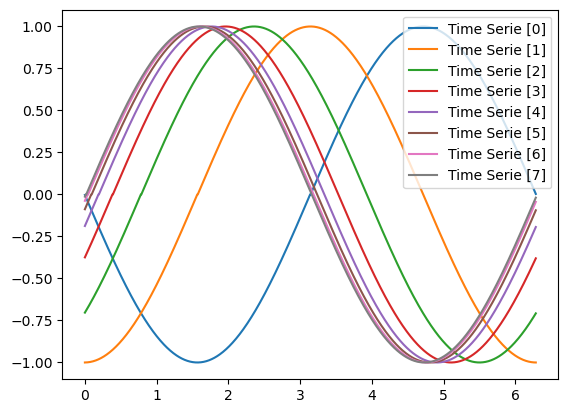

In [3]:
tmsg.plot_time_series(time_series=time_series)

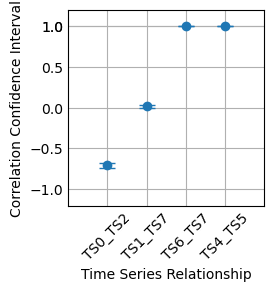

In [38]:
import math

#More discrepant time series
pearsonr_TS0_TS2 = st.pearsonr(time_series[0].real, time_series[2].real)
pearsonr_TS1_TS7 = st.pearsonr(time_series[1].real, time_series[7].real)
#Closer time series
pearsonr_TS6_TS7 = st.pearsonr(time_series[6].real, time_series[7].real)
pearsonr_TS4_TS5 = st.pearsonr(time_series[4].real, time_series[5].real)

correlations = [pearsonr_TS0_TS2.correlation,
                pearsonr_TS1_TS7.correlation,
                pearsonr_TS6_TS7.correlation,
                pearsonr_TS4_TS5.correlation]

confidence_intervals = [pearsonr_TS0_TS2.confidence_interval(confidence_level=0.95),
                        pearsonr_TS1_TS7.confidence_interval(confidence_level=0.95),
                        pearsonr_TS6_TS7.confidence_interval(confidence_level=0.95),
                        pearsonr_TS4_TS5.confidence_interval(confidence_level=0.95)]

yerr = []
for confidence_interval in confidence_intervals:

    error = math.fabs((math.fabs(confidence_interval.low) - math.fabs(confidence_interval.high))/2)
    yerr.append(error)



# Rótulos dos intervalos de confiança
labels = ['TS0_TS2', 'TS1_TS7', 'TS6_TS7', 'TS4_TS5']

#plt.style.use('_mpl-gallery')

# plot:
fig, ax = plt.subplots()
plt.xlabel('Time Series Relationship')
plt.ylabel('Correlation Confidence Interval')

ax.errorbar(x=labels, y=correlations, yerr=yerr, fmt='o', linewidth=2, capsize=6)

ax.set(xlim=(-1, 4), xticks=np.arange(0, 5),
       ylim=(-1.2, 1.2), yticks=np.arange(-1.2, 1.2))

plt.yticks([-1, -0.5, 0, 0.5, 1, 1])

plt.xticks(labels, rotation=45)

# Mostra o gráfico
plt.show()


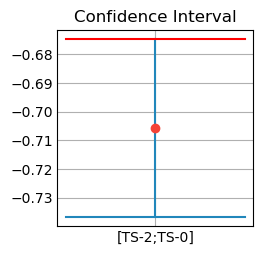

In [39]:
# OLD VERSION
ci_95 = st.pearsonr(time_series[2].real, time_series[0].real).confidence_interval(confidence_level=0.95)
horizontal_line_width = 0.25
left = 1 - horizontal_line_width / 2
right = 1 + horizontal_line_width / 2

plt.title('Confidence Interval')
plt.xticks([1, 2, 3, 4], ['[TS-2;TS-0]', 'BF', 'FFD', 'BFD'])
plt.plot([1,1], [ci_95.high ,ci_95.low], color='#2187bb')
plt.plot([left, right], [ci_95.high, ci_95.high], color='red')
plt.plot([left, right], [ci_95.low, ci_95.low], color='#2187bb')
plt.plot(1, (ci_95.high+ci_95.low)/2, 'o', color='#f44336')
plt.show()